## Introduction

In this project, I will analyze the spread of the new corona virus (nCov). I will use two datasets:
    - The John Hopkins University's dataset which contains aggregated daily data for confirmed cases, deaths and recovered patients. 
    https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
    - The DXY.cn's google sheet which contains information of about 1000 patients. 
    https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/edit#gid=1187587451



29.02.2020

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
url_case = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_cured = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

Let's take a look at the case time series first

In [119]:
# 1st data table

case = pd.read_csv(url_case, index_col=[0, 1, 2, 3])

In [120]:
case

1/22/20  1/23/20  1/24/20  \
Province/State Country/Region Lat     Long                                   
NaN            Thailand       15.0000  101.0000        2        3        5   
               Japan          36.0000  138.0000        2        1        2   
               Singapore      1.2833   103.8333        0        1        3   
               Nepal          28.1667  84.2500         0        0        0   
               Malaysia       2.5000   112.5000        0        0        0   
...                                                  ...      ...      ...   
Socorro, NM    US             33.8837 -106.7235        0        0        0   
Bernalillo, NM US             35.0178 -106.6291        0        0        0   
Oakland, MI    US             42.5922 -83.3362         0        0        0   
Wayne, MI      US             42.2791 -83.3362         0        0        0   
New Castle, DE US             39.5393 -75.6674         0        0        0   

                                                 1/25/20  1/26/20  1/27/20  \
Province/State Country/Region Lat     Long                                   
NaN            Thailand       15.0000  101.0000        7        8        8   
               Japan          36.0000  138.0000        2        4        4   
               Singapore      1.2833   103.8333        3        4        5   
               Nepal          28.1667  84.2500         1        1        1   
               Malaysia       2.5000   112.5000        3        4        4   
...                                                  ...      ...      ...   
Socorro, NM    US             33.8837 -106.7235        0        0        0   
Bernalillo, NM US             35.0178 -106.6291        0        0        0   
Oakland, MI    US             42.5922 -83.3362         0        0        0   
Wayne, MI      US             42.2791 -83.3362         0        0        0   
New Castle, DE US             39.5393 -75.6674         0        0        0   

                                                 1/28/20  1/29/20  1/30/20  \
Province/State Country/Region Lat     Long                                   
NaN            Thailand       15.0000  101.0000       14       14       14   
               Japan          36.0000  138.0000        7        7       11   
               Singapore      1.2833   103.8333        7        7       10   
               Nepal          28.1667  84.2500         1        1        1   
               Malaysia       2.5000   112.5000        4        7        8   
...                                                  ...      ...      ...   
Socorro, NM    US             33.8837 -106.7235        0        0        0   
Bernalillo, NM US             35.0178 -106.6291        0        0        0   
Oakland, MI    US             42.5922 -83.3362         0        0        0   
Wayne, MI      US             42.2791 -83.3362         0        0        0   
New Castle, DE US             39.5393 -75.6674         0        0        0   

                                                 1/31/20  ...  3/2/20  3/3/20  \
Province/State Country/Region Lat     Long                ...                   
NaN            Thailand       15.0000  101.0000       19  ...      43      43   
               Japan          36.0000  138.0000       15  ...     274     293   
               Singapore      1.2833   103.8333       13  ...     108     110   
               Nepal          28.1667  84.2500         1  ...       1       1   
               Malaysia       2.5000   112.5000        8  ...      29      36   
...                                                  ...  ...     ...     ...   
Socorro, NM    US             33.8837 -106.7235        0  ...       0       0   
Bernalillo, NM US             35.0178 -106.6291        0  ...       0       0   
Oakland, MI    US             42.5922 -83.3362         0  ...       0       0   
Wayne, MI      US             42.2791 -83.3362         0  ...       0       0   
New Castle, DE US             39

stacked = case.stack()
stacked

In [122]:
unstacked = stacked.reset_index()
unstacked

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Thailand,15.0000,101.0000,1/22/20,2
1,NaN,Thailand,15.0000,101.0000,1/23/20,3
2,NaN,Thailand,15.0000,101.0000,1/24/20,5
3,NaN,Thailand,15.0000,101.0000,1/25/20,7
4,NaN,Thailand,15.0000,101.0000,1/26/20,8
...,...,...,...,...,...,...
20195,"New Castle, DE",US,39.5393,-75.6674,3/7/20,0
20196,"New Castle, DE",US,39.5393,-75.6674,3/8/20,0
20197,"New Castle, DE",US,39.5393,-75.6674,3/9/20,0
20198,"New Castle, DE",US,39.5393,-75.6674,3/10/20,0


In [123]:
unstacked = unstacked.rename(columns={'level_4': 'date'})
unstacked

,Province/State,Country/Region,Lat,Long,date,0
0,NaN,Thailand,15.0000,101.0000,1/22/20,2
1,NaN,Thailand,15.0000,101.0000,1/23/20,3
2,NaN,Thailand,15.0000,101.0000,1/24/20,5
3,NaN,Thailand,15.0000,101.0000,1/25/20,7
4,NaN,Thailand,15.0000,101.0000,1/26/20,8
...,...,...,...,...,...,...
20195,"New Castle, DE",US,39.5393,-75.6674,3/7/20,0
20196,"New Castle, DE",US,39.5393,-75.6674,3/8/20,0
20197,"New Castle, DE",US,39.5393,-75.6674,3/9/20,0
20198,"New Castle, DE",US,39.5393,-75.6674,3/10/20,0


In [124]:
new_df = unstacked.rename(columns={0: 'number_of_case'})
new_df['new_case'] = new_df.groupby('Country/Region').number_of_case.diff(1)
new_df

,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,NaN
1,NaN,Thailand,15.0000,101.0000,1/23/20,3,1.0
2,NaN,Thailand,15.0000,101.0000,1/24/20,5,2.0
3,NaN,Thailand,15.0000,101.0000,1/25/20,7,2.0
4,NaN,Thailand,15.0000,101.0000,1/26/20,8,1.0
...,...,...,...,...,...,...,...
20195,"New Castle, DE",US,39.5393,-75.6674,3/7/20,0,0.0
20196,"New Castle, DE",US,39.5393,-75.6674,3/8/20,0,0.0
20197,"New Castle, DE",US,39.5393,-75.6674,3/9/20,0,0.0
20198,"New Castle, DE",US,39.5393,-75.6674,3/10/20,0,0.0


In [9]:
# Delite strings where "number of case" = 0

#new_df = new_df[new_df.number_of_case != 0]
#new_df

In [125]:
new_df['Province/State'].unique()

array([nan, 'British Columbia', 'New South Wales', 'Victoria',
       'Queensland', 'South Australia', 'From Diamond Princess',
       'Western Australia', 'Tasmania', 'Northern Territory', 'Ontario',
       'Alberta', 'Quebec', 'Washington', 'New York', 'California',
       'Massachusetts', 'Diamond Princess', 'Grand Princess', 'Georgia',
       'Colorado', 'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming',
       'Hubei', 'France', 'G

In [126]:
new_df['Country/Region'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'Netherlands', 'San Marino', 'Belarus', 'Iceland',
       'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal',
       'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary',
       'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina',
       'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colo

In [12]:
#new_df.groupby('Country/Region').sum()

In [127]:
# 2st data table

death = pd.read_csv(url_death, index_col=[0, 1, 2, 3])
death

1/22/20  1/23/20  1/24/20  \
Province/State Country/Region Lat     Long                                   
NaN            Thailand       15.0000  101.0000        0        0        0   
               Japan          36.0000  138.0000        0        0        0   
               Singapore      1.2833   103.8333        0        0        0   
               Nepal          28.1667  84.2500         0        0        0   
               Malaysia       2.5000   112.5000        0        0        0   
...                                                  ...      ...      ...   
Socorro, NM    US             33.8837 -106.7235        0        0        0   
Bernalillo, NM US             35.0178 -106.6291        0        0        0   
Oakland, MI    US             42.5922 -83.3362         0        0        0   
Wayne, MI      US             42.2791 -83.3362         0        0        0   
New Castle, DE US             39.5393 -75.6674         0        0        0   

                                                 1/25/20  1/26/20  1/27/20  \
Province/State Country/Region Lat     Long                                   
NaN            Thailand       15.0000  101.0000        0        0        0   
               Japan          36.0000  138.0000        0        0        0   
               Singapore      1.2833   103.8333        0        0        0   
               Nepal          28.1667  84.2500         0        0        0   
               Malaysia       2.5000   112.5000        0        0        0   
...                                                  ...      ...      ...   
Socorro, NM    US             33.8837 -106.7235        0        0        0   
Bernalillo, NM US             35.0178 -106.6291        0        0        0   
Oakland, MI    US             42.5922 -83.3362         0        0        0   
Wayne, MI      US             42.2791 -83.3362         0        0        0   
New Castle, DE US             39.5393 -75.6674         0        0        0   

                                                 1/28/20  1/29/20  1/30/20  \
Province/State Country/Region Lat     Long                                   
NaN            Thailand       15.0000  101.0000        0        0        0   
               Japan          36.0000  138.0000        0        0        0   
               Singapore      1.2833   103.8333        0        0        0   
               Nepal          28.1667  84.2500         0        0        0   
               Malaysia       2.5000   112.5000        0        0        0   
...                                                  ...      ...      ...   
Socorro, NM    US             33.8837 -106.7235        0        0        0   
Bernalillo, NM US             35.0178 -106.6291        0        0        0   
Oakland, MI    US             42.5922 -83.3362         0        0        0   
Wayne, MI      US             42.2791 -83.3362         0        0        0   
New Castle, DE US             39.5393 -75.6674         0        0        0   

                                                 1/31/20  ...  3/2/20  3/3/20  \
Province/State Country/Region Lat     Long                ...                   
NaN            Thailand       15.0000  101.0000        0  ...       1       1   
               Japan          36.0000  138.0000        0  ...       6       6   
               Singapore      1.2833   103.8333        0  ...       0       0   
               Nepal          28.1667  84.2500         0  ...       0       0   
               Malaysia       2.5000   112.5000        0  ...       0       0   
...                                                  ...  ...     ...     ...   
Socorro, NM    US             33.8837 -106.7235        0  ...       0       0   
Bernalillo, NM US             35.0178 -106.6291        0  ...       0       0   
Oakland, MI    US             42.5922 -83.3362         0  ...       0       0   
Wayne, MI      US             42.2791 -83.3362         0  ...       0       0   
New Castle, DE US             39

In [128]:
death_stacked = death.stack()
death_stacked

Province/State  Country/Region  Lat      Long              
NaN             Thailand        15.0000   101.0000  1/22/20    0
                                                    1/23/20    0
                                                    1/24/20    0
                                                    1/25/20    0
                                                    1/26/20    0
                                                              ..
New Castle, DE  US              39.5393  -75.6674   3/7/20     0
                                                    3/8/20     0
                                                    3/9/20     0
                                                    3/10/20    0
                                                    3/11/20    0
Length: 20200, dtype: int64

In [129]:
death_unstacked = death_stacked.reset_index()
death_unstacked

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Thailand,15.0000,101.0000,1/22/20,0
1,NaN,Thailand,15.0000,101.0000,1/23/20,0
2,NaN,Thailand,15.0000,101.0000,1/24/20,0
3,NaN,Thailand,15.0000,101.0000,1/25/20,0
4,NaN,Thailand,15.0000,101.0000,1/26/20,0
...,...,...,...,...,...,...
20195,"New Castle, DE",US,39.5393,-75.6674,3/7/20,0
20196,"New Castle, DE",US,39.5393,-75.6674,3/8/20,0
20197,"New Castle, DE",US,39.5393,-75.6674,3/9/20,0
20198,"New Castle, DE",US,39.5393,-75.6674,3/10/20,0


In [130]:
new_df_death = death_unstacked.rename(columns={'level_4': 'date'})
new_df_death

,Province/State,Country/Region,Lat,Long,date,0
0,NaN,Thailand,15.0000,101.0000,1/22/20,0
1,NaN,Thailand,15.0000,101.0000,1/23/20,0
2,NaN,Thailand,15.0000,101.0000,1/24/20,0
3,NaN,Thailand,15.0000,101.0000,1/25/20,0
4,NaN,Thailand,15.0000,101.0000,1/26/20,0
...,...,...,...,...,...,...
20195,"New Castle, DE",US,39.5393,-75.6674,3/7/20,0
20196,"New Castle, DE",US,39.5393,-75.6674,3/8/20,0
20197,"New Castle, DE",US,39.5393,-75.6674,3/9/20,0
20198,"New Castle, DE",US,39.5393,-75.6674,3/10/20,0


In [131]:
death_df = new_df_death.rename(columns={0: 'number_of_death'})
death_df['new_death'] = death_df.groupby('Country/Region').number_of_death.diff(1)
death_df

,Province/State,Country/Region,Lat,Long,date,number_of_death,new_death
0,NaN,Thailand,15.0000,101.0000,1/22/20,0,NaN
1,NaN,Thailand,15.0000,101.0000,1/23/20,0,0.0
2,NaN,Thailand,15.0000,101.0000,1/24/20,0,0.0
3,NaN,Thailand,15.0000,101.0000,1/25/20,0,0.0
4,NaN,Thailand,15.0000,101.0000,1/26/20,0,0.0
...,...,...,...,...,...,...,...
20195,"New Castle, DE",US,39.5393,-75.6674,3/7/20,0,0.0
20196,"New Castle, DE",US,39.5393,-75.6674,3/8/20,0,0.0
20197,"New Castle, DE",US,39.5393,-75.6674,3/9/20,0,0.0
20198,"New Castle, DE",US,39.5393,-75.6674,3/10/20,0,0.0


In [132]:
# 3rd data table

cured = pd.read_csv(url_cured, index_col=[0, 1, 2, 3])
cured

1/22/20  1/23/20  1/24/20  \
Province/State Country/Region Lat     Long                                   
NaN            Thailand       15.0000  101.0000        0        0        0   
               Japan          36.0000  138.0000        0        0        0   
               Singapore      1.2833   103.8333        0        0        0   
               Nepal          28.1667  84.2500         0        0        0   
               Malaysia       2.5000   112.5000        0        0        0   
...                                                  ...      ...      ...   
Socorro, NM    US             33.8837 -106.7235        0        0        0   
Bernalillo, NM US             35.0178 -106.6291        0        0        0   
Oakland, MI    US             42.5922 -83.3362         0        0        0   
Wayne, MI      US             42.2791 -83.3362         0        0        0   
New Castle, DE US             39.5393 -75.6674         0        0        0   

                                                 1/25/20  1/26/20  1/27/20  \
Province/State Country/Region Lat     Long                                   
NaN            Thailand       15.0000  101.0000        0        2        2   
               Japan          36.0000  138.0000        0        1        1   
               Singapore      1.2833   103.8333        0        0        0   
               Nepal          28.1667  84.2500         0        0        0   
               Malaysia       2.5000   112.5000        0        0        0   
...                                                  ...      ...      ...   
Socorro, NM    US             33.8837 -106.7235        0        0        0   
Bernalillo, NM US             35.0178 -106.6291        0        0        0   
Oakland, MI    US             42.5922 -83.3362         0        0        0   
Wayne, MI      US             42.2791 -83.3362         0        0        0   
New Castle, DE US             39.5393 -75.6674         0        0        0   

                                                 1/28/20  1/29/20  1/30/20  \
Province/State Country/Region Lat     Long                                   
NaN            Thailand       15.0000  101.0000        5        5        5   
               Japan          36.0000  138.0000        1        1        1   
               Singapore      1.2833   103.8333        0        0        0   
               Nepal          28.1667  84.2500         0        0        0   
               Malaysia       2.5000   112.5000        0        0        0   
...                                                  ...      ...      ...   
Socorro, NM    US             33.8837 -106.7235        0        0        0   
Bernalillo, NM US             35.0178 -106.6291        0        0        0   
Oakland, MI    US             42.5922 -83.3362         0        0        0   
Wayne, MI      US             42.2791 -83.3362         0        0        0   
New Castle, DE US             39.5393 -75.6674         0        0        0   

                                                 1/31/20  ...  3/2/20  3/3/20  \
Province/State Country/Region Lat     Long                ...                   
NaN            Thailand       15.0000  101.0000        5  ...      31      31   
               Japan          36.0000  138.0000        1  ...      32      43   
               Singapore      1.2833   103.8333        0  ...      78      78   
               Nepal          28.1667  84.2500         0  ...       1       1   
               Malaysia       2.5000   112.5000        0  ...      18      22   
...                                                  ...  ...     ...     ...   
Socorro, NM    US             33.8837 -106.7235        0  ...       0       0   
Bernalillo, NM US             35.0178 -106.6291        0  ...       0       0   
Oakland, MI    US             42.5922 -83.3362         0  ...       0       0   
Wayne, MI      US             42.2791 -83.3362         0  ...       0       0   
New Castle, DE US             39

In [133]:
cured_stacked = cured.stack()
cured_stacked

Province/State  Country/Region  Lat      Long              
NaN             Thailand        15.0000   101.0000  1/22/20    0
                                                    1/23/20    0
                                                    1/24/20    0
                                                    1/25/20    0
                                                    1/26/20    2
                                                              ..
New Castle, DE  US              39.5393  -75.6674   3/7/20     0
                                                    3/8/20     0
                                                    3/9/20     0
                                                    3/10/20    0
                                                    3/11/20    0
Length: 20200, dtype: int64

In [134]:
cured_unstacked = cured_stacked.reset_index()
cured_unstacked

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Thailand,15.0000,101.0000,1/22/20,0
1,NaN,Thailand,15.0000,101.0000,1/23/20,0
2,NaN,Thailand,15.0000,101.0000,1/24/20,0
3,NaN,Thailand,15.0000,101.0000,1/25/20,0
4,NaN,Thailand,15.0000,101.0000,1/26/20,2
...,...,...,...,...,...,...
20195,"New Castle, DE",US,39.5393,-75.6674,3/7/20,0
20196,"New Castle, DE",US,39.5393,-75.6674,3/8/20,0
20197,"New Castle, DE",US,39.5393,-75.6674,3/9/20,0
20198,"New Castle, DE",US,39.5393,-75.6674,3/10/20,0


In [135]:
new_df_cured = cured_unstacked.rename(columns={'level_4': 'date'})
new_df_cured

,Province/State,Country/Region,Lat,Long,date,0
0,NaN,Thailand,15.0000,101.0000,1/22/20,0
1,NaN,Thailand,15.0000,101.0000,1/23/20,0
2,NaN,Thailand,15.0000,101.0000,1/24/20,0
3,NaN,Thailand,15.0000,101.0000,1/25/20,0
4,NaN,Thailand,15.0000,101.0000,1/26/20,2
...,...,...,...,...,...,...
20195,"New Castle, DE",US,39.5393,-75.6674,3/7/20,0
20196,"New Castle, DE",US,39.5393,-75.6674,3/8/20,0
20197,"New Castle, DE",US,39.5393,-75.6674,3/9/20,0
20198,"New Castle, DE",US,39.5393,-75.6674,3/10/20,0


In [136]:
cured_df = new_df_cured.rename(columns={0: 'number_of_cured'})
cured_df['new_cured'] = cured_df.groupby('Country/Region').number_of_cured.diff(1)
cured_df

,Province/State,Country/Region,Lat,Long,date,number_of_cured,new_cured
0,NaN,Thailand,15.0000,101.0000,1/22/20,0,NaN
1,NaN,Thailand,15.0000,101.0000,1/23/20,0,0.0
2,NaN,Thailand,15.0000,101.0000,1/24/20,0,0.0
3,NaN,Thailand,15.0000,101.0000,1/25/20,0,0.0
4,NaN,Thailand,15.0000,101.0000,1/26/20,2,2.0
...,...,...,...,...,...,...,...
20195,"New Castle, DE",US,39.5393,-75.6674,3/7/20,0,0.0
20196,"New Castle, DE",US,39.5393,-75.6674,3/8/20,0,0.0
20197,"New Castle, DE",US,39.5393,-75.6674,3/9/20,0,0.0
20198,"New Castle, DE",US,39.5393,-75.6674,3/10/20,0,0.0


In [137]:
# Put 3 tables in 1

#pd.merge(new_df, death_df,cured_df, on='Date', how='outer')

df2in1 = new_df.merge(death_df, how='left')
df2in1

,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,NaN,0,NaN
1,NaN,Thailand,15.0000,101.0000,1/23/20,3,1.0,0,0.0
2,NaN,Thailand,15.0000,101.0000,1/24/20,5,2.0,0,0.0
3,NaN,Thailand,15.0000,101.0000,1/25/20,7,2.0,0,0.0
4,NaN,Thailand,15.0000,101.0000,1/26/20,8,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...
20195,"New Castle, DE",US,39.5393,-75.6674,3/7/20,0,0.0,0,0.0
20196,"New Castle, DE",US,39.5393,-75.6674,3/8/20,0,0.0,0,0.0
20197,"New Castle, DE",US,39.5393,-75.6674,3/9/20,0,0.0,0,0.0
20198,"New Castle, DE",US,39.5393,-75.6674,3/10/20,0,0.0,0,0.0


In [138]:
# 3 tables in 1

df3in1 = df2in1.merge(cured_df, how='left')
df3in1

,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death,number_of_cured,new_cured
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,NaN,0,NaN,0,NaN
1,NaN,Thailand,15.0000,101.0000,1/23/20,3,1.0,0,0.0,0,0.0
2,NaN,Thailand,15.0000,101.0000,1/24/20,5,2.0,0,0.0,0,0.0
3,NaN,Thailand,15.0000,101.0000,1/25/20,7,2.0,0,0.0,0,0.0
4,NaN,Thailand,15.0000,101.0000,1/26/20,8,1.0,0,0.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...
20195,"New Castle, DE",US,39.5393,-75.6674,3/7/20,0,0.0,0,0.0,0,0.0
20196,"New Castle, DE",US,39.5393,-75.6674,3/8/20,0,0.0,0,0.0,0,0.0
20197,"New Castle, DE",US,39.5393,-75.6674,3/9/20,0,0.0,0,0.0,0,0.0
20198,"New Castle, DE",US,39.5393,-75.6674,3/10/20,0,0.0,0,0.0,0,0.0


In [139]:
# Clining 0 values in column 'number_of_case'

df3in1 = df3in1.loc[df3in1['number_of_case'] != 0]
df3in1

,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death,number_of_cured,new_cured
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,NaN,0,NaN,0,NaN
1,NaN,Thailand,15.0000,101.0000,1/23/20,3,1.0,0,0.0,0,0.0
2,NaN,Thailand,15.0000,101.0000,1/24/20,5,2.0,0,0.0,0,0.0
3,NaN,Thailand,15.0000,101.0000,1/25/20,7,2.0,0,0.0,0,0.0
4,NaN,Thailand,15.0000,101.0000,1/26/20,8,1.0,0,0.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...
19999,"Socorro, NM",US,33.8837,-106.7235,3/11/20,2,2.0,0,0.0,0,0.0
20049,"Bernalillo, NM",US,35.0178,-106.6291,3/11/20,1,1.0,0,0.0,0,0.0
20099,"Oakland, MI",US,42.5922,-83.3362,3/11/20,1,1.0,0,0.0,0,0.0
20149,"Wayne, MI",US,42.2791,-83.3362,3/11/20,1,1.0,0,0.0,0,0.0


In [140]:
# Add new column "location"
df3in1.insert(0, 'location', '')

In [115]:
df3in1

,location,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death,number_of_cured,new_cured
0,NaN,NaN,Thailand,15.0000,101.0000,2020-01-22,2,NaN,0,NaN,0,NaN
1,NaN,NaN,Thailand,15.0000,101.0000,2020-01-23,3,1.0,0,0.0,0,0.0
2,NaN,NaN,Thailand,15.0000,101.0000,2020-01-24,5,2.0,0,0.0,0,0.0
3,NaN,NaN,Thailand,15.0000,101.0000,2020-01-25,7,2.0,0,0.0,0,0.0
4,NaN,NaN,Thailand,15.0000,101.0000,2020-01-26,8,1.0,0,0.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19999,US,"Socorro, NM",US,33.8837,-106.7235,2020-03-11,2,2.0,0,0.0,0,0.0
20049,US,"Bernalillo, NM",US,35.0178,-106.6291,2020-03-11,1,1.0,0,0.0,0,0.0
20099,US,"Oakland, MI",US,42.5922,-83.3362,2020-03-11,1,1.0,0,0.0,0,0.0
20149,US,"Wayne, MI",US,42.2791,-83.3362,2020-03-11,1,1.0,0,0.0,0,0.0


In [141]:
# Put in "location" Province/State. If there NA value, put Country/Region.
df3in1["location"] = np.where(df3in1["Province/State"].isnull(),df3in1['Province/State'],df3in1['Country/Region'])

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
# How many cases by countries

sum_of_cases= pd.DataFrame()
sum_of_cases = df3in1.groupby('location')['number_of_case'].sum() 
sum_of_cases.to_frame()


,number_of_case
location,
Australia,1252
Canada,828
China,2557572
Cruise Ship,17780
Denmark,926
France,9709
US,7130
United Kingdom,2383


In [143]:
# Summary COVID-19

df3in1.agg({'number_of_case': 'sum', 'number_of_death': 'sum', 'number_of_cured' : "sum"})

number_of_case     2852138
number_of_death      87375
number_of_cured     991986
dtype: int64

In [144]:
# Sum of new cases by dates and location 

df3in1.groupby(['location',df3in1['date']]).new_case.sum()
#df3in1['new_case'] = df3in1.groupby(['location', 'date']).number_of_case.sum().diff()


location        date   
Australia       1/26/20     4.0
                1/27/20     1.0
                1/28/20     0.0
                1/29/20     1.0
                1/30/20     3.0
                           ... 
United Kingdom  3/5/20     30.0
                3/6/20     48.0
                3/7/20     43.0
                3/8/20     67.0
                3/9/20     48.0
Name: new_case, Length: 329, dtype: float64

In [145]:
# Random checking
df3in1[(df3in1.location == "US") & (df3in1.date == '3/5/20')]


,location,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death,number_of_cured,new_cured
5243,US,Diamond Princess,US,35.4437,139.6380,3/5/20,45,0.0,0,0.0,0,0.0
14293,US,"Alameda County, CA",US,37.6017,-121.7195,3/5/20,1,0.0,0,0.0,0,0.0
15293,US,"Providence County, RI",US,41.8882,-71.4774,3/5/20,2,0.0,0,0.0,0,0.0
15643,US,"Nassau County, NY",US,40.6546,-73.5594,3/5/20,1,1.0,0,0.0,0,0.0
15893,US,"Santa Clara County, CA",US,37.3541,-121.9552,3/5/20,20,9.0,0,0.0,1,0.0
15943,US,"Clark County, NV",US,36.0796,-115.0940,3/5/20,1,1.0,0,0.0,0,0.0
15993,US,"Fort Bend County, TX",US,29.5693,-95.8143,3/5/20,1,1.0,0,0.0,0,0.0
16043,US,"Grant County, WA",US,47.1981,-119.3732,3/5/20,1,1.0,0,0.0,0,0.0
16093,US,"Santa Rosa County, FL",US,30.7690,-86.9824,3/5/20,1,1.0,0,0.0,0,0.0
16143,US,"Williamson County, TN",US,35.9179,-86.8622,3/5/20,1,1.0,0,0.0,0,0.0


Text(0, 0.5, 'Number of cases')

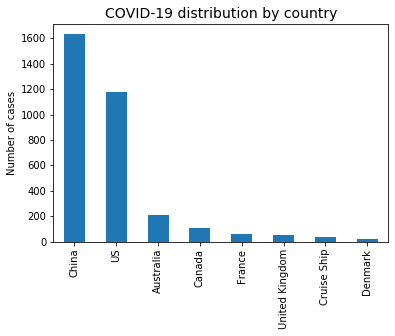

In [277]:
# Plot by countries

df3in1.location.value_counts().plot(kind='bar');
plt.title('COVID-19 distribution by country',fontsize=14)
plt.ylabel('Number of cases')

In [147]:
# Analysis by countries and cases
gb= pd.DataFrame()
gb= df3in1.groupby('location').agg({'number_of_case': 'sum', 'number_of_death': 'sum', 'number_of_cured' : "sum"})
gb

,number_of_case,number_of_death,number_of_cured
location,,,
Australia,1252,23,390
Canada,828,3,121
China,2557572,80676,962141
Cruise Ship,17780,102,619
Denmark,926,0,6
France,9709,177,234
US,7130,236,185
United Kingdom,2383,26,256


In [148]:
gb= pd.DataFrame()
gb= df3in1.groupby('Province/State').agg({'number_of_case': 'sum', 'number_of_death': 'sum', 'number_of_cured' : "sum"})
gb

,number_of_case,number_of_death,number_of_cured
Province/State,,,
"Adams, IN",2,0,0
"Alachua, FL",1,0,0
"Alameda County, CA",18,0,0
Alberta,40,0,0
Anhui,35767,179,19881
...,...,...,...
"Worcester, MA",2,0,0
Xinjiang,2611,60,1206
"Yolo County, CA",6,0,0


Text(0.5, 1.0, 'Plot max of death')

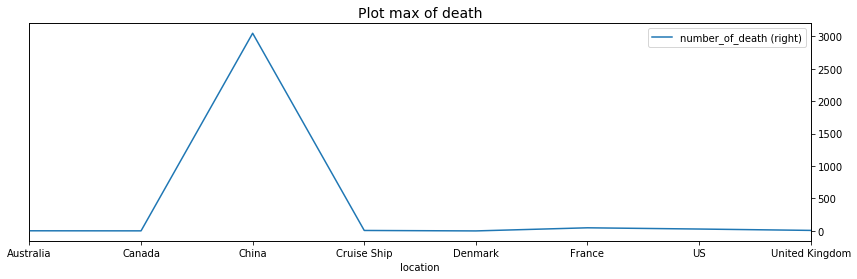

In [275]:
# Plot max of death

db = df3in1.groupby(["location"]).agg({'number_of_death': 'max'})
fig, ax = plt.subplots(figsize=(14, 4))
feature_2 = db.plot(kind='line', y='number_of_death',ax=ax, secondary_y=True)
plt.title('Plot max of death',fontsize=14)

Text(0.5, 1.0, 'Plot max of cured')

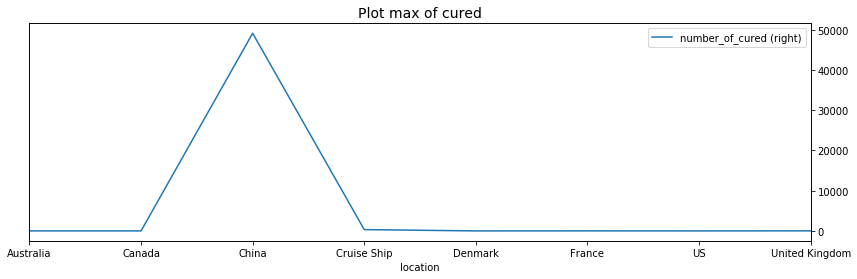

In [274]:
# Plot max of cured

db = df3in1.groupby(["location"]).agg({'number_of_cured': 'max'})
fig, ax = plt.subplots(figsize=(14, 4))
feature_2 = db.plot(kind='line', y='number_of_cured',ax=ax, secondary_y=True)
plt.title('Plot max of cured',fontsize=14)

In [151]:
# Mortality Rate (Percentage of deaths to infected people)

gb['number_of_death'].sum()*100/gb['number_of_case'].sum().round(2)

# RESULT: Globally, about 3.1% of reported COVID-19 cases have died. 
#By comparison, seasonal flu generally kills far fewer than 1% of those infected.


3.1276418820594554

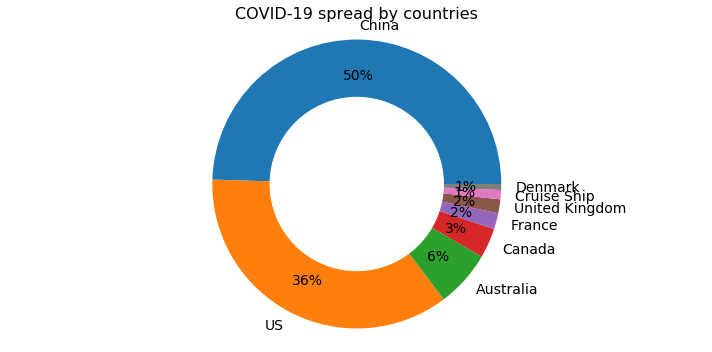

In [152]:
# Pie chart "COVID-19 spread by countries"

cc = df3in1['location'].value_counts().plot(kind='pie', figsize=(10,5), autopct="%.0f%%", pctdistance = 0.75, textprops={'fontsize': 14})

cc.set_title('COVID-19 spread by countries', fontsize=16)
cc.set_ylabel('')
circle = plt.Circle((0,0), 0.6, color='white')
cc.add_artist(circle)
plt.axis('equal')
plt.tight_layout()



In [299]:
# Active Cases today
df3in1['number_of_case'].sum() - (df3in1['number_of_death'].sum()+ df3in1['number_of_cured'].sum())

1772777

In [154]:
# Convert the date column to datetime object
df3in1['date'] =  pd.to_datetime(df3in1['date'], infer_datetime_format=True)
df3in1

/Users/olga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,Province/State,Country/Region,Lat,Long,date,number_of_case,new_case,number_of_death,new_death,number_of_cured,new_cured
0,NaN,NaN,Thailand,15.0000,101.0000,2020-01-22,2,NaN,0,NaN,0,NaN
1,NaN,NaN,Thailand,15.0000,101.0000,2020-01-23,3,1.0,0,0.0,0,0.0
2,NaN,NaN,Thailand,15.0000,101.0000,2020-01-24,5,2.0,0,0.0,0,0.0
3,NaN,NaN,Thailand,15.0000,101.0000,2020-01-25,7,2.0,0,0.0,0,0.0
4,NaN,NaN,Thailand,15.0000,101.0000,2020-01-26,8,1.0,0,0.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19999,US,"Socorro, NM",US,33.8837,-106.7235,2020-03-11,2,2.0,0,0.0,0,0.0
20049,US,"Bernalillo, NM",US,35.0178,-106.6291,2020-03-11,1,1.0,0,0.0,0,0.0
20099,US,"Oakland, MI",US,42.5922,-83.3362,2020-03-11,1,1.0,0,0.0,0,0.0
20149,US,"Wayne, MI",US,42.2791,-83.3362,2020-03-11,1,1.0,0,0.0,0,0.0


Text(0.5, 0, 'Number of cases')

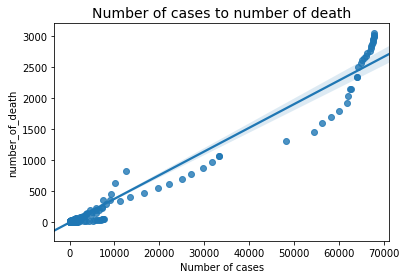

In [273]:

fig, ax = plt.subplots()
sns.regplot("number_of_case" , "number_of_death", data=df3in1, ax=ax)
ax.set_title("Number of cases to number of death", fontsize=14)
plt.xlabel('Number of cases')

In [156]:
# Plot: COVID-19 spread by date 
#Filter Australia #Take date #Plot time series 
dff = df3in1.groupby(['date']).agg({'number_of_case':'sum'}).reset_index()
dff

,date,number_of_case
0,2020-01-22,555
1,2020-01-23,653
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927


Text(0, 0.5, 'number of case')

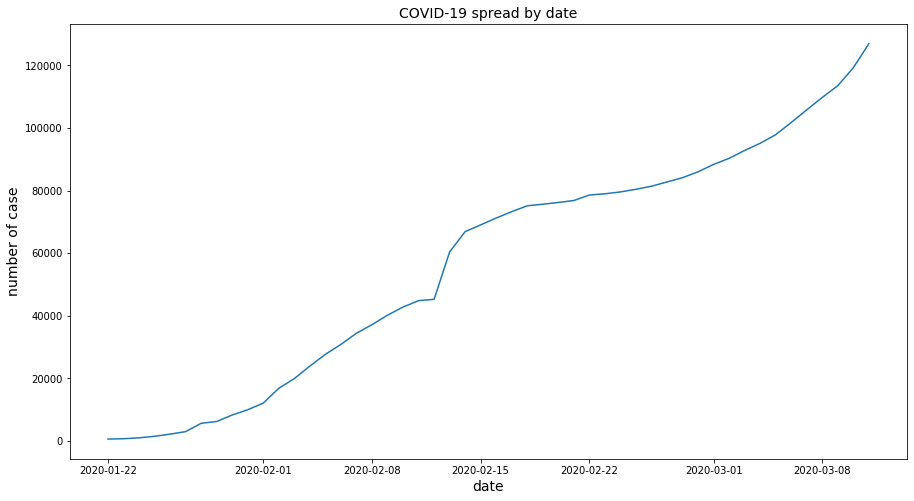

In [157]:
x = dff["date"]
y = dff["number_of_case"]
#dff.plot(kind='line')
fig,ax = plt.subplots(figsize=(15,8))
line = ax.plot(x,y)
plt.title('COVID-19 spread by date',fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('number of case', fontsize=14)


Text(0, 0.5, 'number of cases')

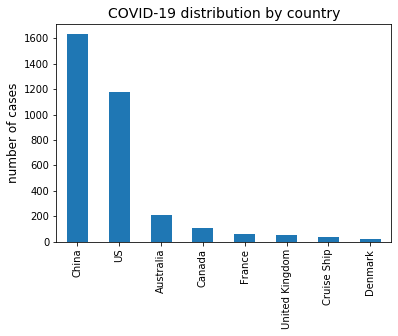

In [272]:
# Countries with the highest number of coronavirus infections
df3in1.location.value_counts().plot(kind='bar');
plt.title('COVID-19 distribution by country' , fontsize=14)
plt.ylabel('number of cases', fontsize=12)

Text(0, 0.5, 'number of cases')

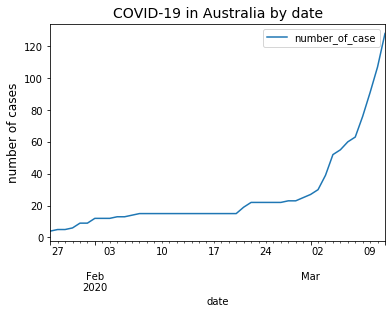

In [269]:
# COVID-19 in Australia by date
dff2 = df3in1[df3in1.location == "Australia"].groupby('date').agg({'number_of_case':'sum'}).plot(kind='line')
plt.title('COVID-19 in Australia by date',fontsize=14)
plt.ylabel('number of cases', fontsize=12)

Text(0, 0.5, 'number of cases')

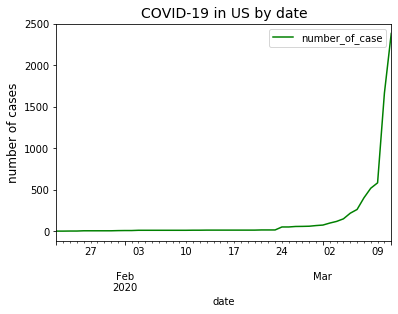

In [268]:
# COVID-19 in US by date
dff1 = df3in1[df3in1.location == "US"].groupby('date').agg({'number_of_case':'sum'}).plot(kind='line', color = 'green')
plt.title('COVID-19 in US by date',fontsize=14)
plt.ylabel('number of cases', fontsize=12)

Text(0, 0.5, 'number of cases')

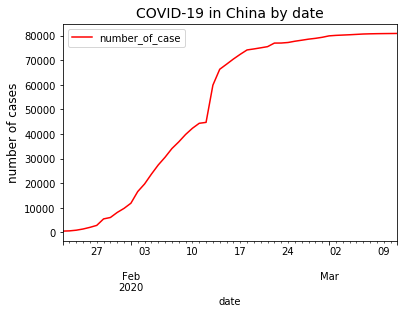

In [267]:
# COVID-19 in China by date
dff3 = df3in1[df3in1.location == "China"].groupby('date').agg({'number_of_case':'sum'}).plot(kind='line', color ='red')
plt.title('COVID-19 in China by date',fontsize=14)
plt.ylabel('number of cases', fontsize=12)

In [241]:
#Time series
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score


In [284]:
time_ser = df3in1[["date", "number_of_case"]]
time_ser


,date,number_of_case
0,2020-01-22,2
1,2020-01-23,3
2,2020-01-24,5
3,2020-01-25,7
4,2020-01-26,8
...,...,...
19999,2020-03-11,2
20049,2020-03-11,1
20099,2020-03-11,1
20149,2020-03-11,1


In [285]:
time_ser = time_ser.set_index('date') 
time_ser

,number_of_case
date,
2020-01-22,2
2020-01-23,3
2020-01-24,5
2020-01-25,7
2020-01-26,8
...,...
2020-03-11,2
2020-03-11,1
2020-03-11,1


In [286]:
# Total new case per day
time_ser.resample('D').sum()


,number_of_case
date,
2020-01-22,555
2020-01-23,653
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
2020-01-27,2927
2020-01-28,5578
2020-01-29,6166
2020-01-30,8234


Text(0, 0.5, 'number of cases')

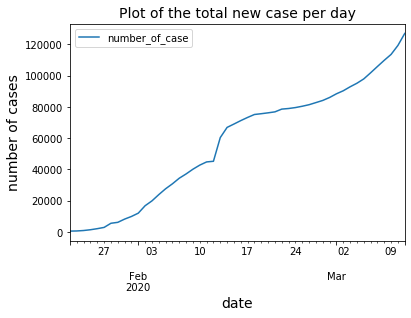

In [287]:
#Plot of the total new case per day
time_ser.resample('D').sum().plot()
plt.title('Plot of the total new case per day',fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('number of cases', fontsize=14)

Text(0.5, 1.0, 'Time Series plot')

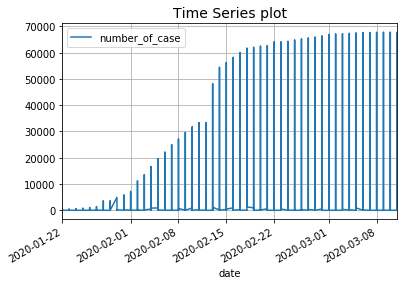

In [288]:
#Time Series plot
time_ser.plot(grid =True)
plt.title('Time Series plot',fontsize=14)

from datetime import datetime
start_date= datetime(2020,1,22)
end_date=datetime(2020,3,8)
time_ser[(start_date <=time_ser.index) & (time_ser.index <=end_date)].plot(grid = True)